In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium

import os
from copy import copy

In [4]:
local = "..\\dataset\\incoming\\"

In [26]:
# mapa com geopandas
shapefile = local+"BR_UF_2020.shp"
mapa_brasil = gpd.read_file(shapefile)

# mapa com folium
mapa_interativo = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

In [8]:
# leitura dos datasets
customers = pd.read_csv(local+"olist_customers_dataset.csv")
order_items = pd.read_csv(local+"olist_order_items_dataset.csv")
order_payments = pd.read_csv(local+"olist_order_payments_dataset.csv")
orders = pd.read_csv(local+"olist_orders_dataset.csv")
products = pd.read_csv(local+"olist_products_dataset.csv")
sellers = pd.read_csv(local+"olist_sellers_dataset.csv")
reviews = pd.read_csv(local+"olist_order_reviews_dataset.csv")

In [5]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [6]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93


In [7]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [8]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


## Análises Univariadas [Thais]

In [9]:
dfs = {"customers": customers, "sellers": sellers, "products": products, "orders": orders, "order_items": order_items, "order_payments": order_payments, "reviews": reviews}

In [10]:
# verificando a existência de linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----linhas nulas:\n{dfs[names].isna().sum()}\n\n-----tipo de dado:\n{dfs[names].dtypes}\n---------------\n\n")

customers
-----linhas nulas:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-----tipo de dado:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
---------------


sellers
-----linhas nulas:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

-----tipo de dado:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
---------------


products
-----linhas nulas:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_lengt

In [11]:
# deletando linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----deletando linhas\n")
    dfs[names].dropna(axis=0, inplace=True)

customers
-----deletando linhas

sellers
-----deletando linhas

products
-----deletando linhas

orders
-----deletando linhas

order_items
-----deletando linhas

order_payments
-----deletando linhas

reviews
-----deletando linhas



### Describe

In [15]:
customers[["customer_city", "customer_state"]].describe()

,customer_city,customer_state
count,99441,99441
unique,4119,27
top,sao paulo,SP
freq,15540,41746


In [16]:
sellers[["seller_city", "seller_state"]].describe()

,seller_city,seller_state
count,3095,3095
unique,611,23
top,sao paulo,SP
freq,694,1849


In [17]:
products[["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000
mean,2276.956586,30.854545,16.958813,23.208596
std,4279.291845,16.955965,13.636115,12.078762
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [18]:
products[["product_category_name"]].describe()

,product_category_name
count,32340
unique,73
top,cama_mesa_banho
freq,3029


In [19]:
orders[["order_status"]].describe()

,order_status
count,96461
unique,2
top,delivered
freq,96455


In [20]:
order_items[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [21]:
order_payments[["payment_type"]].describe()

,payment_type
count,103886
unique,5
top,credit_card
freq,76795


### customers e sellers

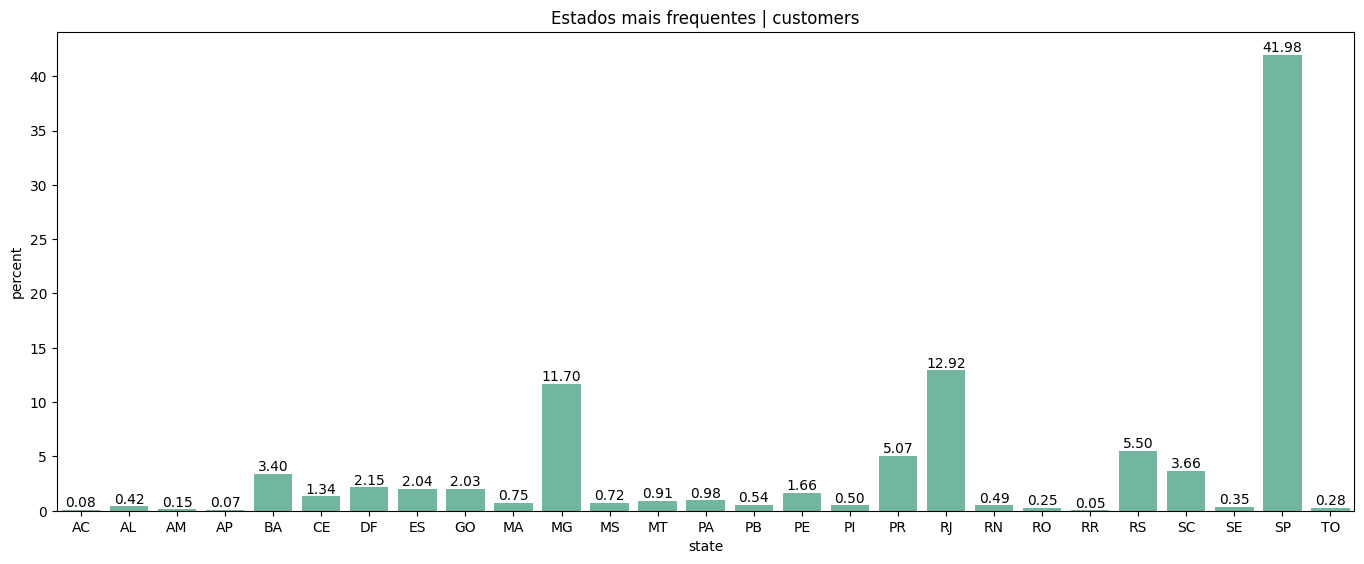

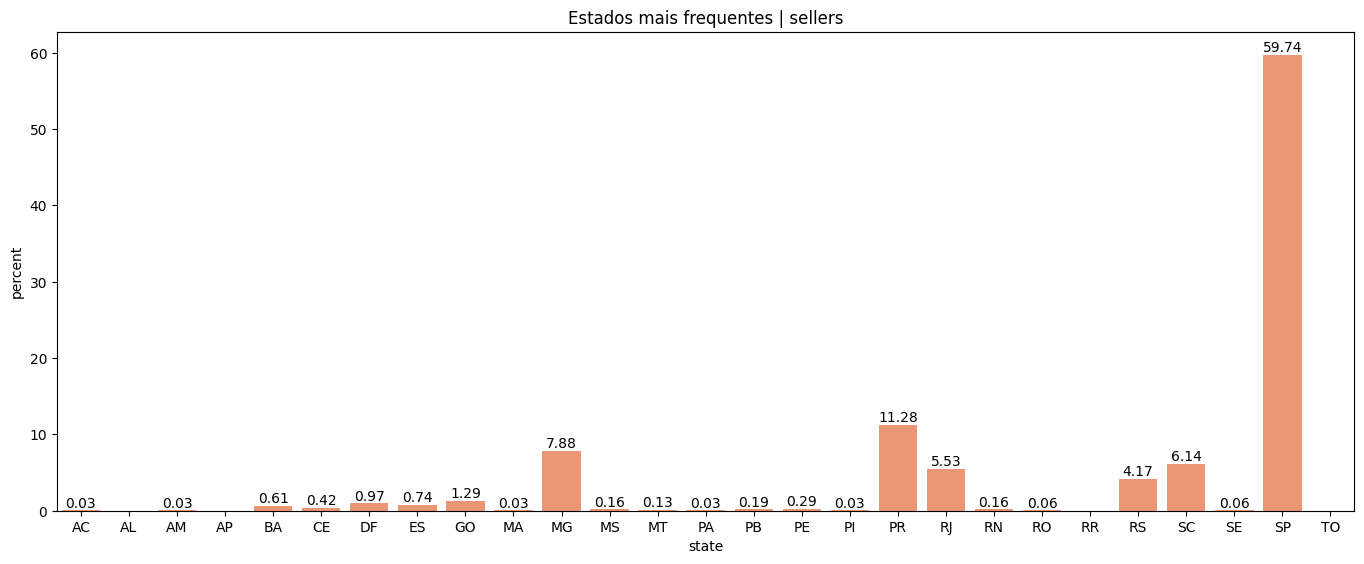

In [70]:
# renomeando as colunas para facilitar a manipulação
customers.rename(columns={"customer_city": "city", "customer_state": "state", "customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)
sellers.rename(columns={"seller_city": "city", "seller_state": "state", "seller_zip_code_prefix": "zip_code_prefix"}, inplace=True)

# armazenando os datasets de customers e sellers numa dict para facilitar a manipulação
dfs2 = {"customers": customers, "sellers": sellers}

# index para ordenar os dados no gráfico
state_order = sorted(customers["state"])
c = 0

for names, tables in dfs2.items():
    fig0, ax0 = plt.subplots(figsize=(14,6))

    sns.countplot(data=tables, x="state", order=state_order, stat="percent", color=sns.color_palette("Set2")[c], ax=ax0)
    ax0.set_title(f"Estados mais frequentes | {names}")

    for i in ax0.containers:
        ax0.bar_label(i, fmt="%.2f")
    c=+1
    plt.tight_layout(pad=2)
    plt.show()

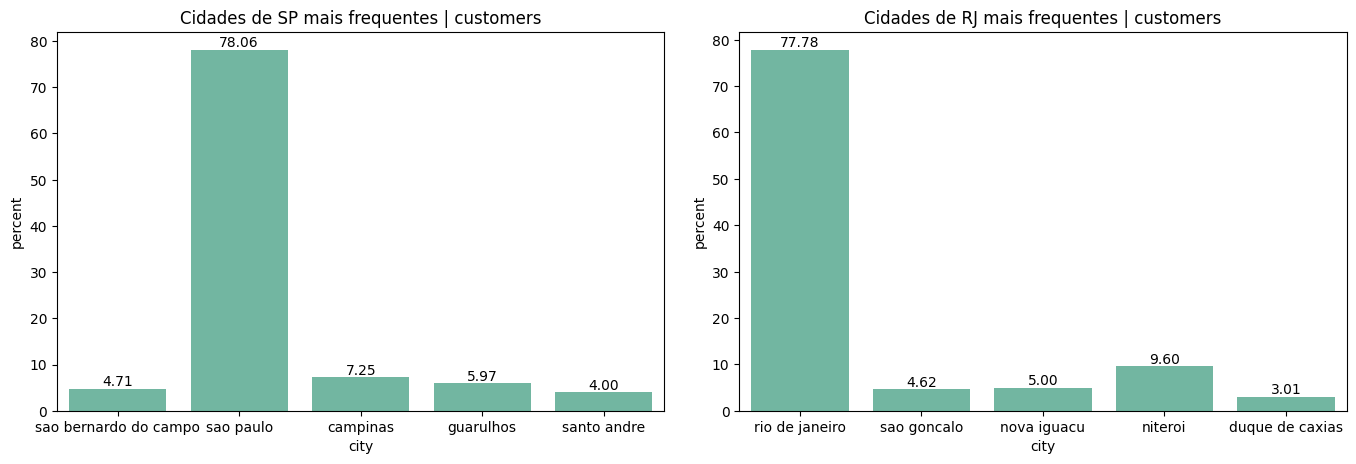

In [101]:
customers_top5_SP = customers[customers["state"]=="SP"]["city"].value_counts().head().index
customers_top5_RJ = customers[customers["state"]=="RJ"]["city"].value_counts().head().index

fig1, ax1 = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=customers[customers["city"].isin(customers_top5_SP)], x="city", stat="percent", color=sns.color_palette("Set2")[0], ax=ax1[0])
ax1[0].set_title(f"Cidades de SP mais frequentes | customers")
for i in ax1[0].containers:
    ax1[0].bar_label(i, fmt="%.2f")

sns.countplot(data=customers[customers["city"].isin(customers_top5_RJ)], x="city", stat="percent", color=sns.color_palette("Set2")[0], ax=ax1[1])
ax1[1].set_title(f"Cidades de RJ mais frequentes | customers")
for i in ax1[1].containers:
    ax1[1].bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

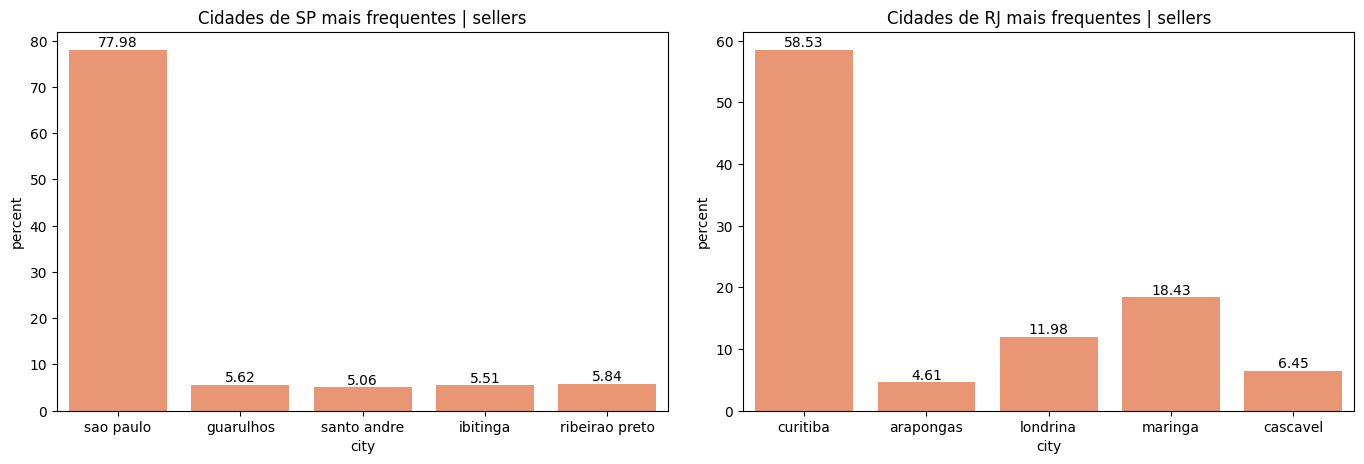

In [98]:
sellers_top5_SP = sellers[sellers["state"]=="SP"]["city"].value_counts().head().index
sellers_top5_PR = sellers[sellers["state"]=="PR"]["city"].value_counts().head().index

fig2, ax2 = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=sellers[sellers["city"].isin(sellers_top5_SP)], x="city", stat="percent", color=sns.color_palette("Set2")[1], ax=ax2[0])
ax2[0].set_title(f"Cidades de SP mais frequentes | sellers")

for i in ax2[0].containers:
    ax2[0].bar_label(i, fmt="%.2f")

sns.countplot(data=sellers[sellers["city"].isin(sellers_top5_PR)], x="city", stat="percent", color=sns.color_palette("Set2")[1], ax=ax2[1])
ax2[1].set_title(f"Cidades de RJ mais frequentes | sellers")

for i in ax2[1].containers:
    ax2[1].bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

### products

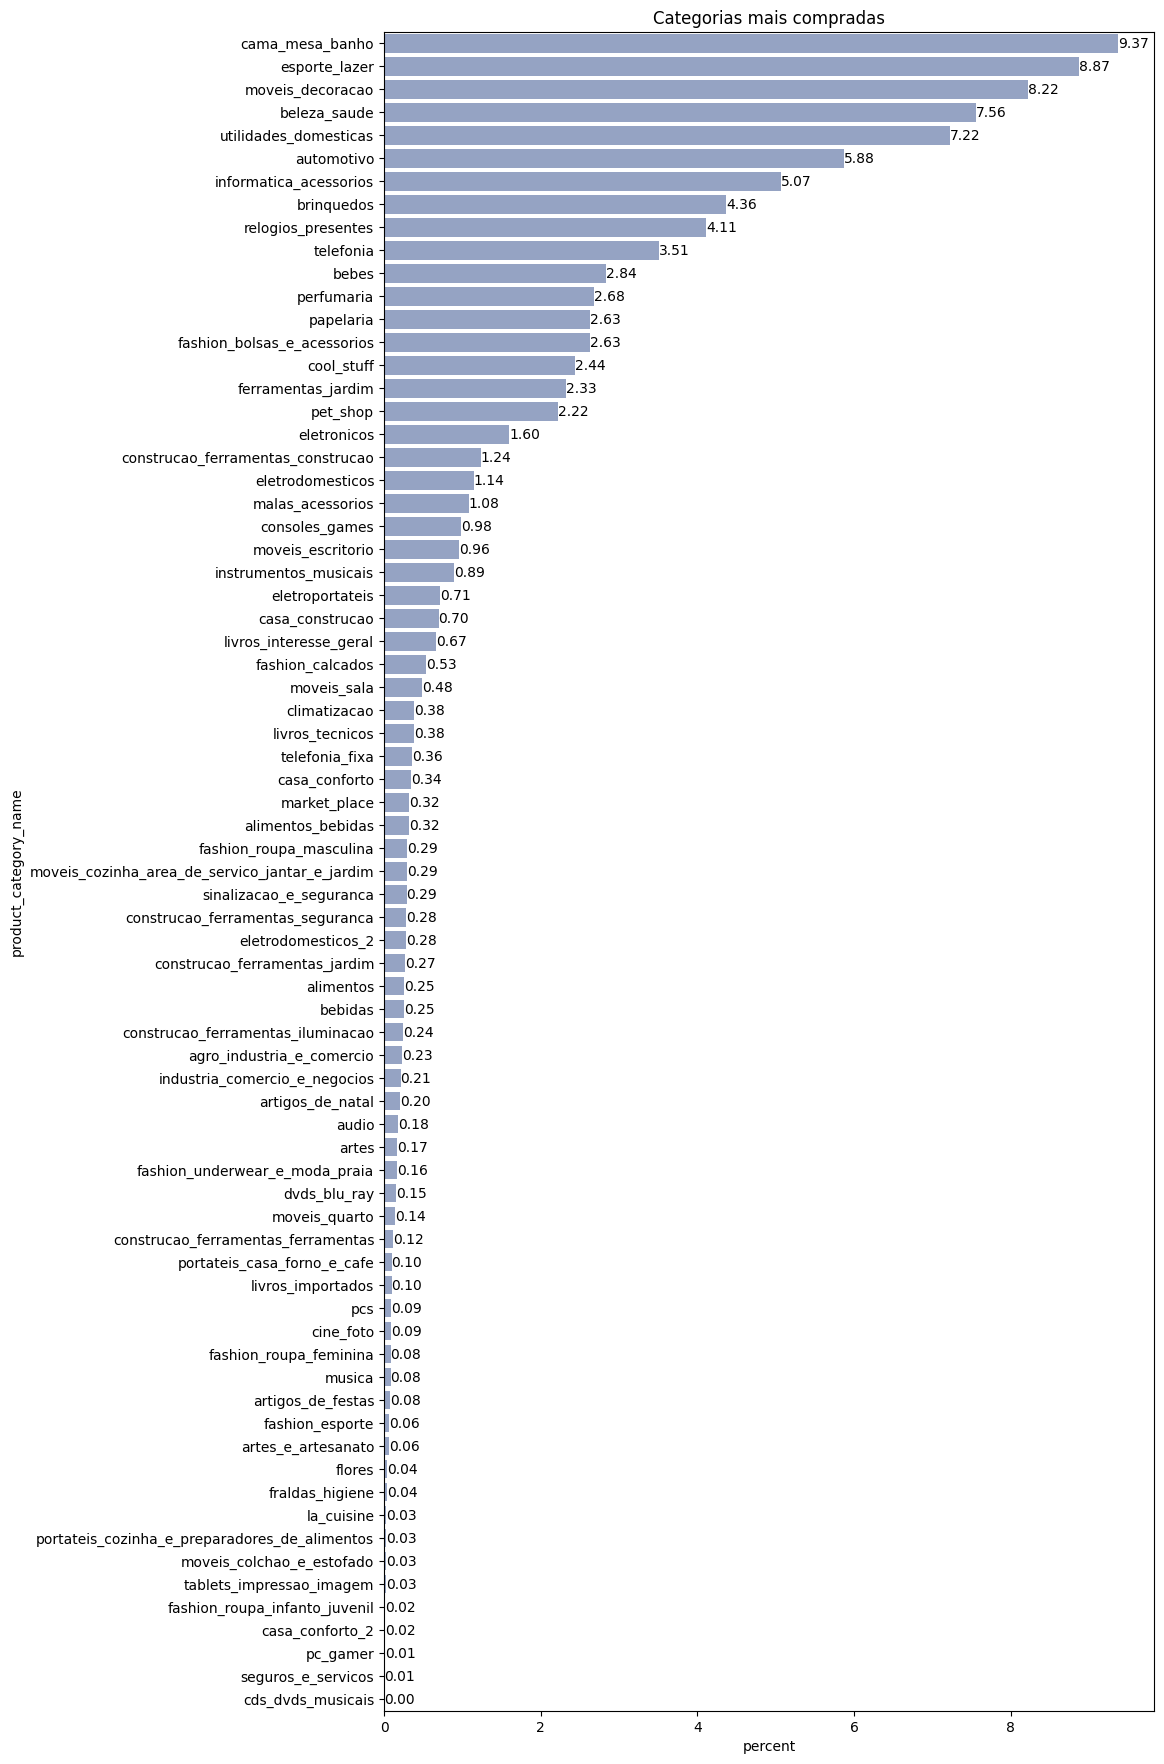

In [113]:
product_order = products["product_category_name"].value_counts().index

fig3, ax3 = plt.subplots(figsize=(12,18))

sns.countplot(data=products, y="product_category_name", orient="h", stat="percent", order=product_order, color=sns.color_palette("Set2")[2], ax=ax3)
ax3.set_title(f"Categorias mais compradas")

for i in ax3.containers:
    ax3.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

### orders

In [123]:
orders["days_between_estimated_and_delivery"] = (pd.to_datetime(orders["order_delivered_customer_date"]) - pd.to_datetime(orders["order_estimated_delivery_date"])).dt.days
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_between_estimated_and_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,-10
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,-11
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,-2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,-6
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,-21


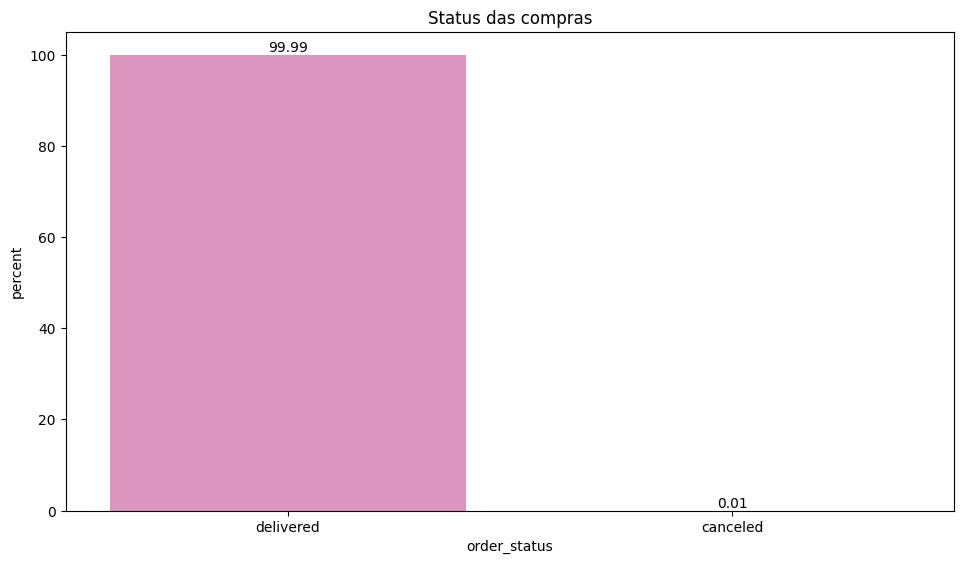

In [126]:
fig4, ax4 = plt.subplots(figsize=(10,6))

sns.countplot(data=orders, x="order_status", stat="percent", color=sns.color_palette("Set2")[3], ax=ax4)
ax4.set_title(f"Status das compras")

for i in ax4.containers:
    ax4.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

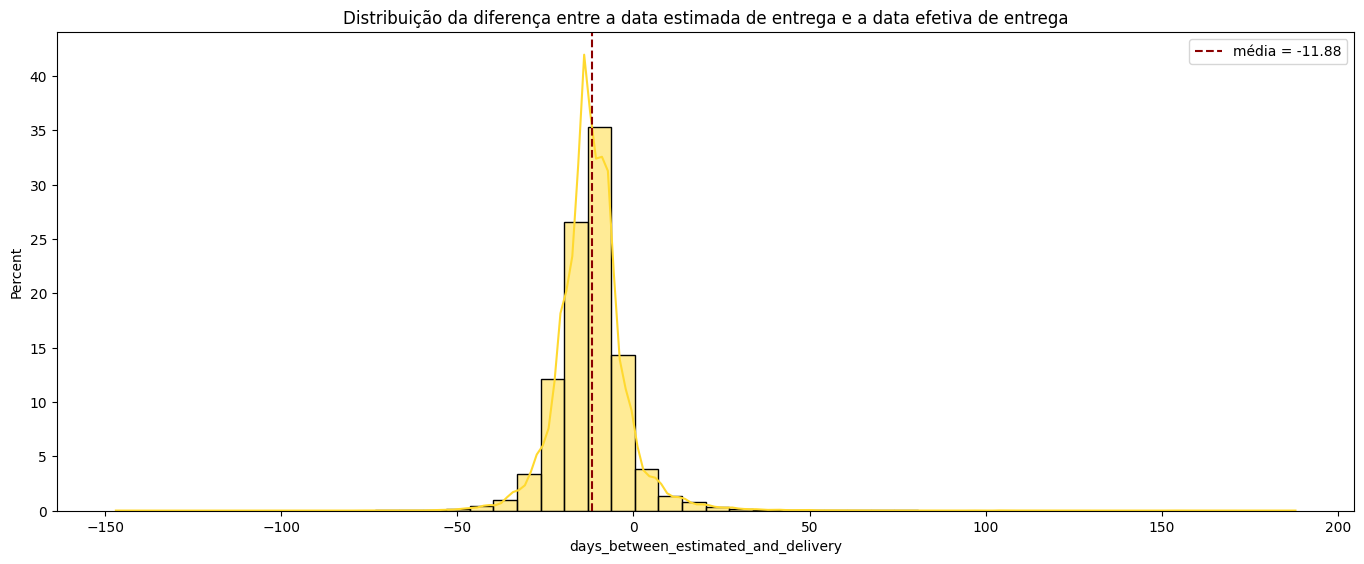

In [143]:
fig5, ax5 = plt.subplots(figsize=(14,6))

sns.histplot(data=orders, x="days_between_estimated_and_delivery", stat="percent", bins=50, kde=True, color=sns.color_palette("Set2")[5], ax=ax5)
ax5.axvline(orders["days_between_estimated_and_delivery"].mean(), color="darkred", linestyle="dashed", label=f"média = {orders['days_between_estimated_and_delivery'].mean():.2f}")
ax5.set_title(f"Distribuição da diferença entre a data estimada de entrega e a data efetiva de entrega")

plt.tight_layout(pad=2)
plt.legend()
plt.show()

### order items

In [151]:
order_items1 =  order_items.merge(products[["product_id", "product_category_name"]], on="product_id", how="left")
order_items1.head(2)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93,pet_shop


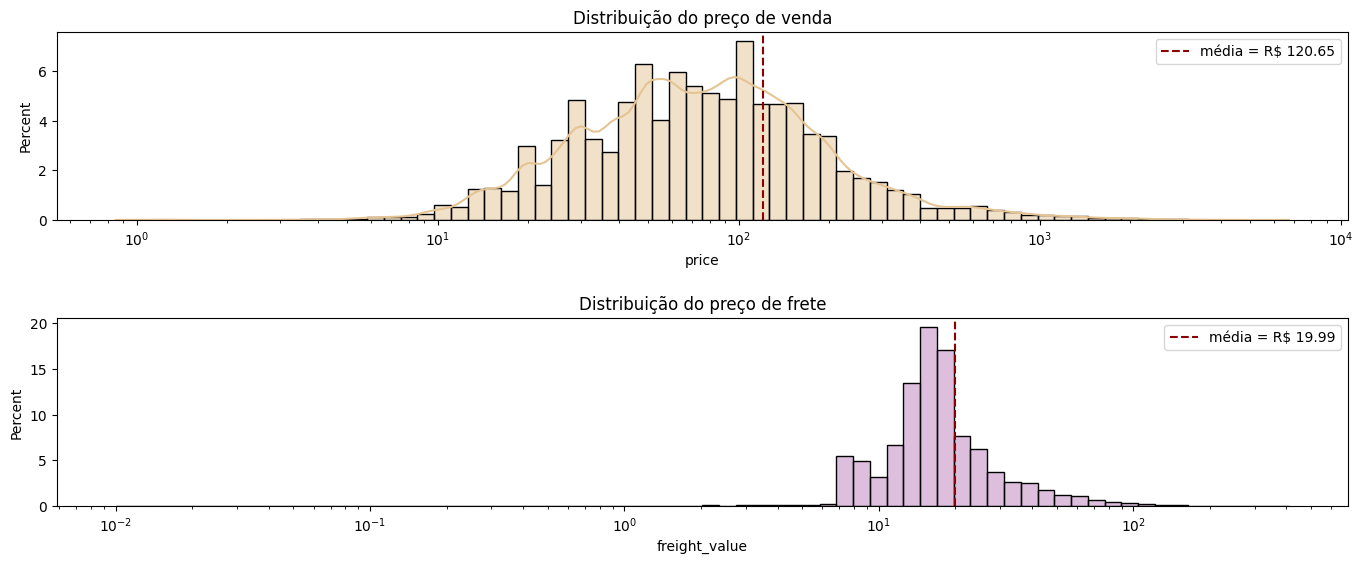

In [165]:
fig6, ax6 = plt.subplots(2, figsize=(14,6))

sns.histplot(data=order_items1, x="price", stat="percent", kde=True, log_scale=True, bins=70, color=sns.color_palette("Set2")[6], ax=ax6[0])
ax6[0].axvline(order_items1["price"].mean(), color="darkred", linestyle="dashed", label=f"média = R$ {order_items1['price'].mean():.2f}")
ax6[0].set_title(f"Distribuição do preço de venda")
ax6[0].legend()

sns.histplot(data=order_items1, x="freight_value", stat="percent", kde=True, log_scale=True,  bins=70, color=sns.color_palette("Set3")[9], ax=ax6[1])
ax6[1].axvline(order_items1["freight_value"].mean(), color="darkred", linestyle="dashed", label=f"média = R$ {order_items1['freight_value'].mean():.2f}")
ax6[1].set_title(f"Distribuição do preço de frete")
ax6[1].legend()

plt.tight_layout(pad=2)
plt.show()

### order payments

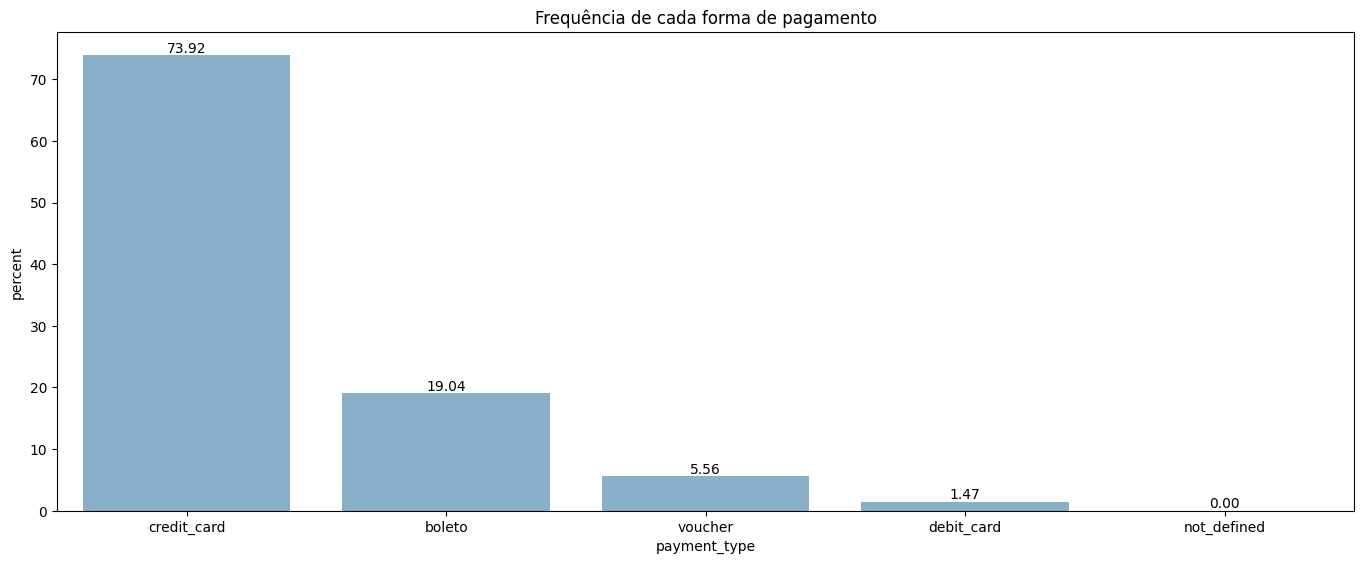

In [175]:
fig7, ax7 = plt.subplots(figsize=(14,6))

sns.countplot(data=order_payments, x="payment_type", stat="percent", color=sns.color_palette("Set3")[4], ax=ax7)
ax7.set_title(f"Frequência de cada forma de pagamento")

for i in ax7.containers:
    ax7.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

## Análises Multivariadas